In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.append('..')
from lib import *
from lib.maxent import *

In [2]:
params = np.load('data/Human_9.npz')
hi = params['hi']
Jij = params['Jij']

In [3]:
datasets = ['train', 'test', 'model']
sample_matrices = {}
for dataset in datasets:
    sample_matrices[dataset] =  np.loadtxt('data/%s_matrix.csv.gz' % dataset).astype(int)

In [26]:
observables = ['fi', 'fij', 'cij', 'fijk', 'cijk', 'fold_ijk']#, 'fijkl']
observables_dict = {key: dict() for key in observables}
for dataset in ['train', 'test', 'model']:
    params = np.load('data/%s_observables.npz'%dataset)
    for observable in observables:
        observables_dict[observable][dataset] = params[observable]

In [46]:
fi = observables_dict['fi']['train'].mean(axis=0)
sample_independent = np.random.choice(np.arange(0, 20, 1), size=sample_matrices['test'].shape, p=fi)

In [53]:
energies_test = np.array([energy_potts(x, hi, Jij) for x in sample_matrices['test']])
energies_model = np.array([energy_potts(x, hi, Jij) for x in sample_matrices['model']])
energies_independent = np.array([energy_potts(x, hi, Jij) for x in sample_independent])

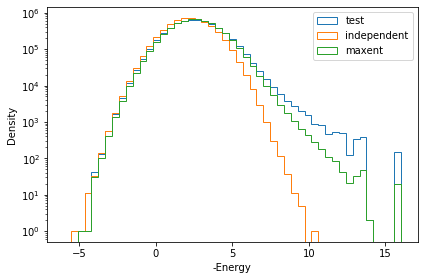

In [65]:
bins = np.linspace(-6, 16, 50)
fig, ax = plt.subplots()
ax.hist(-energies_test, bins=bins, histtype='step', label='test')
ax.hist(-energies_independent, bins=bins, histtype='step', label='independent')
ax.hist(-energies_model, bins=bins, histtype='step', label='maxent')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('-Energy')
ax.set_ylabel('Density')
fig.tight_layout()
fig.savefig('density_of_states.png')

In [69]:
x = sample_matrices['test'][energies_test.argmin()]


array([12, 12, 12, 12, 12, 12, 12, 12, 12])